# Project: International Travel Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, I am going to see whether higher GDP per capita, higher Purchasing Power Parity(PPP)and higher Carrier Departure make people internationally.

>Reserach Questions:
- **Country Comparative Analysis**: Do higher GDP per capita, higher Purchasing Power Parity(PPP) and higher Carrier Departure makes people travel internationally?
- **Specific Country Analysis**:Have higher GDP per capita made people in Japan, Germany and US travel internationally?

>In order to answer my reserach questions, I am going to use the following data from Gapminder:
- Independent Variable: **International Tourism, Number of Arrivals**
- Dependent Variable: **GDP per Capita**
- Dependent Variable: **Price level ratio of PPP conversion factor (GDP) to market exchange rate**
- Dependent Variable: **Air Transport, Registered Carrier Departure**
- Dependent Variable: **Population**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

#### Import data as 
> Import the following data as...
- **International Tourism, Number of Arrivals** as `dprt`
- **GDP per Capita** as `gdp`
- **Price level ratio of PPP conversion factor (GDP) to market exchange rate** as `ppp`
- **Air Transport, Registered Carrier Departure** as `carrier`
- **Population** as `population`

In [2]:
# Import relevant data that are downloaded from Gapminder
gdp= pd.read_csv("gdppercapita_us_inflation_adjusted.csv")
dprt= pd.read_csv("st_int_dprt.csv")
ppp= pd.read_csv("pa_nus_pppc_rf.csv")
carrier= pd.read_csv("is_air_dprt.csv")
population= pd.read_csv("population_total.csv")

### Data Cleaning (Replace this with more specific notes!)

### Assessing Data - GDP 

In [3]:
gdp.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0,618.0,618.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0
2,Algeria,2470.0,2080.0,1630.0,2130.0,2200.0,2280.0,2110.0,2240.0,2410.0,...,4390.0,4390.0,4460,4500.0,4560.0,4600.0,4680.0,4760.0,4830.0,4830.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,43000.0,43900.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0,3580.0,3480.0


In [4]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 59 columns):
country    190 non-null object
1960       88 non-null float64
1961       89 non-null float64
1962       89 non-null float64
1963       89 non-null float64
1964       89 non-null float64
1965       93 non-null float64
1966       96 non-null float64
1967       97 non-null float64
1968       99 non-null float64
1969       99 non-null float64
1970       108 non-null float64
1971       108 non-null float64
1972       108 non-null float64
1973       108 non-null float64
1974       110 non-null float64
1975       114 non-null float64
1976       115 non-null float64
1977       120 non-null float64
1978       120 non-null float64
1979       121 non-null float64
1980       132 non-null float64
1981       136 non-null float64
1982       138 non-null float64
1983       138 non-null float64
1984       140 non-null float64
1985       141 non-null float64
1986       144 non-null float64
1987      

In [5]:
# Assess the row of the countries of my interest
gdp[gdp["country"]== "Japan"]

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
83,Japan,8610.0,9400.0,10100.0,10900.0,12000.0,12600.0,13800.0,15200.0,17100.0,...,45200.0,42700.0,44500,44500.0,45300.0,46200.0,46500.0,47200.0,47700.0,48600.0


In [6]:
gdp[gdp["country"]== "United States"]

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
181,United States,17000.0,17100.0,17900.0,18400.0,19200.0,20200.0,21300.0,21600.0,22400.0,...,49400.0,47600.0,48400,48800.0,49500.0,50000.0,50900.0,51900.0,52300.0,53100.0


In [7]:
gdp[gdp["country"]== "Germany"]

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
63,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42400.0,40100.0,41800,44100.0,44300.0,44400.0,45000.0,45400.0,45900.0,46700.0


In [8]:
# Check from what year there is data
gdp[gdp["country"]== "Germany"].isnull().all()

country    False
1960        True
1961        True
1962        True
1963        True
1964        True
1965        True
1966        True
1967        True
1968        True
1969        True
1970       False
1971       False
1972       False
1973       False
1974       False
1975       False
1976       False
1977       False
1978       False
1979       False
1980       False
1981       False
1982       False
1983       False
1984       False
1985       False
1986       False
1987       False
1988       False
1989       False
1990       False
1991       False
1992       False
1993       False
1994       False
1995       False
1996       False
1997       False
1998       False
1999       False
2000       False
2001       False
2002       False
2003       False
2004       False
2005       False
2006       False
2007       False
2008       False
2009       False
2010       False
2011       False
2012       False
2013       False
2014       False
2015       False
2016       False
2017       Fal

- **year info**: year is on the name of column 
- **year info**: GDP is float
- **`country` column**: The US, Germany, and Japan, counties of my interest in this research, have data in the following years: US: 1960-2017, Japan: 1960-2017, Germany: 1970-2017

### Assessing Data - the international tourism, the number of departure

Note:For answering my question, I use 2017 data

In [9]:
dprt.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,955000.0,1300000.0,1350000.0,...,3400000.0,3440000.0,4120000.0,3960000.0,3930000.0,4150000.0,4500000.0,4850000.0,5190000.0,5420000.0
1,Algeria,1090000.0,874000.0,827000.0,879000.0,903000.0,1010000.0,1190000.0,1260000.0,1250000.0,...,1680000.0,1760000.0,1720000.0,1910000.0,2140000.0,2840000.0,3640000.0,4530000.0,5060000.0,5610000.0
2,Angola,3000.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,3820000.0,4300000.0,4520000.0,4590000.0,4790000.0,4950000.0,4760000.0,3010000.0,3090000.0,...,4980000.0,5310000.0,6690000.0,7270000.0,6750000.0,6520000.0,7810000.0,10400000.0,12200000.0,11100000.0
4,Armenia,NaN,NaN,NaN,NaN,NaN,111000.0,110000.0,131000.0,169000.0,...,526000.0,563000.0,715000.0,965000.0,1080000.0,1200000.0,1190000.0,1260000.0,1480000.0,1620000.0


In [10]:
dprt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 25 columns):
country    122 non-null object
1995       75 non-null float64
1996       76 non-null float64
1997       78 non-null float64
1998       80 non-null float64
1999       80 non-null float64
2000       84 non-null float64
2001       84 non-null float64
2002       85 non-null float64
2003       84 non-null float64
2004       81 non-null float64
2005       89 non-null float64
2006       89 non-null float64
2007       88 non-null float64
2008       89 non-null float64
2009       94 non-null float64
2010       97 non-null float64
2011       95 non-null float64
2012       97 non-null float64
2013       95 non-null float64
2014       93 non-null float64
2015       91 non-null float64
2016       93 non-null float64
2017       91 non-null float64
2018       88 non-null float64
dtypes: float64(24), object(1)
memory usage: 24.0+ KB


In [11]:
# Assessing the row of the countries of my interest
dprt[dprt["country"]=="Japan"]

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
55,Japan,15300000.0,16700000.0,16800000.0,15800000.0,16400000.0,17800000.0,16200000.0,16500000.0,13300000.0,...,15400000.0,16600000.0,17000000.0,18500000.0,17500000.0,16900000.0,16200000.0,17100000.0,17900000.0,19000000.0


In [12]:
dprt[dprt["country"]=="United States"]

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
117,United States,51300000.0,53000000.0,53200000.0,55700000.0,57200000.0,61300000.0,59400000.0,58100000.0,56300000.0,...,62100000.0,61100000.0,59200000.0,60700000.0,61300000.0,68200000.0,74200000.0,80200000.0,87700000.0,92600000.0


In [13]:
dprt[dprt["country"]=="Germany"]

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
43,Germany,NaN,NaN,55800000.0,69200000.0,78100000.0,80500000.0,81600000.0,80400000.0,85300000.0,...,85500000.0,85900000.0,84700000.0,82700000.0,87500000.0,83000000.0,83700000.0,91000000.0,92400000.0,109000000.0


In [14]:
# Check from what year there is data
dprt[dprt["country"]=="Germany"].isnull().all()

country    False
1995        True
1996        True
1997       False
1998       False
1999       False
2000       False
2001       False
2002       False
2003       False
2004       False
2005       False
2006       False
2007       False
2008       False
2009       False
2010       False
2011       False
2012       False
2013       False
2014       False
2015       False
2016       False
2017       False
2018       False
dtype: bool

- **year info**: year is on the name of column 
- **year info**: dprt is float,although there are no decimal numbers
- **`country` column **: the US, Germany and Japan, counties of my interest in this research, have data in the following years: US: 1995-2017, Japan: 1995-2017, Germany: 1997-2017

### Assessing Data - PPP

In [15]:
ppp.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.301,0.332,0.363,0.355,0.340,0.324,0.307,0.288,0.288,0.266
1,Albania,0.242,0.176,0.110,0.179,0.256,0.282,0.339,0.264,0.269,...,0.467,0.425,0.435,0.404,0.417,0.407,0.339,0.347,0.351,0.394
2,Algeria,0.360,0.260,0.262,0.272,0.229,0.212,0.225,0.225,0.211,...,0.316,0.354,0.418,0.415,0.398,0.383,0.284,0.262,0.266,0.266
3,Angola,0.307,0.277,0.226,0.201,0.150,0.159,0.187,0.174,0.140,...,0.513,0.576,0.727,0.753,0.753,0.751,0.587,0.519,0.616,0.532
4,Antigua and Barbuda,0.649,0.644,0.645,0.642,0.648,0.650,0.658,0.658,0.665,...,0.646,0.648,0.641,0.642,0.625,0.625,0.637,0.642,0.624,0.623


In [16]:
ppp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 30 columns):
country    187 non-null object
1990       159 non-null float64
1991       159 non-null float64
1992       162 non-null float64
1993       165 non-null float64
1994       167 non-null float64
1995       173 non-null float64
1996       173 non-null float64
1997       173 non-null float64
1998       173 non-null float64
1999       175 non-null float64
2000       180 non-null float64
2001       181 non-null float64
2002       182 non-null float64
2003       182 non-null float64
2004       183 non-null float64
2005       183 non-null float64
2006       183 non-null float64
2007       184 non-null float64
2008       185 non-null float64
2009       185 non-null float64
2010       185 non-null float64
2011       187 non-null float64
2012       184 non-null float64
2013       184 non-null float64
2014       184 non-null float64
2015       182 non-null float64
2016       182 non-null float64


In [17]:
# Assess the row of the countries of my interest
ppp[ppp["country"]=="Japan"]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
81,Japan,1.3,1.39,1.47,1.64,1.75,1.86,1.57,1.39,1.27,...,1.23,1.27,1.35,1.31,1.04,0.973,0.855,0.943,0.914,0.918


In [18]:
ppp[ppp["country"]=="United States"]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
178,United States,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
ppp[ppp["country"]=="Germany"]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
61,Germany,1.14,1.11,1.21,1.17,1.19,1.35,1.27,1.1,1.08,...,1.13,1.07,1.1,1.01,1.03,1.02,0.863,0.85,0.85,0.897


- **year info**: year is on the name of column 
- **year info**: ppp is float
- **`country` column **: the US, Germany and Japan, counties of my interest in this research, have data in the following years: US: 1990-2018, Japan: 1990-2018, Germany: 1990-2018

###  Air Transport, Registered Carrier Departure

In [20]:
carrier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 50 columns):
country    180 non-null object
1970       114 non-null float64
1971       116 non-null float64
1972       115 non-null float64
1973       118 non-null float64
1974       123 non-null float64
1975       128 non-null float64
1976       132 non-null float64
1977       132 non-null float64
1978       133 non-null float64
1979       134 non-null float64
1980       139 non-null float64
1981       142 non-null float64
1982       143 non-null float64
1983       143 non-null float64
1984       146 non-null float64
1985       147 non-null float64
1986       147 non-null float64
1987       148 non-null float64
1988       148 non-null float64
1989       148 non-null float64
1990       148 non-null float64
1991       150 non-null float64
1992       153 non-null float64
1993       159 non-null float64
1994       164 non-null float64
1995       160 non-null float64
1996       162 non-null float64


In [21]:
# Assess the row of the countries of my interest
carrier[carrier["country"]=="Japan"]

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
80,Japan,277000.0,395000.0,299000.0,312000.0,321000.0,313000.0,321000.0,346000.0,370000.0,...,642000.0,934000.0,813000.0,875000.0,916000.0,928000.0,956000.0,984000.0,1040000.0,1000000.0


In [22]:
carrier[carrier["country"]=="United States"]

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
171,United States,5100000.0,5000000.0,4990000.0,5060000.0,4650000.0,4580000.0,4690000.0,4800000.0,4860000.0,...,9180000.0,10100000.0,10100000.0,9860000.0,9750000.0,9560000.0,9500000.0,9640000.0,9640000.0,9880000.0


In [23]:
carrier[carrier["country"]=="Germany"]

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
61,Germany,143000.0,154000.0,166000.0,152000.0,180000.0,177000.0,179000.0,181000.0,184000.0,...,1080000.0,972000.0,1020000.0,986000.0,955000.0,946000.0,967000.0,963000.0,956000.0,923000.0


- **year info**: year is on the name of column 
- **year info**: carrier is float
- **`country` column **: the US, Germany and Japan, counties of my interest in this research, have data in the following years: US: 1970-2018, Japan: 1970-2018, Germany: 1970-2018

### Assessing Data - Population

In [24]:
population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000


In [25]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64(301), object(1)
memory usage: 460.2+ KB


In [26]:
# Assess the row of the countries of my interest
population[population["country"]=="Japan"]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
84,Japan,28000000,28100000,28300000,28400000,28600000,28700000,28900000,29000000,29200000,...,78600000,78200000,77800000,77300000,76900000,76500000,76100000,75700000,75300000,75000000


In [27]:
population[population["country"]=="United States"]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
186,United States,6000000,6110000,6230000,6350000,6470000,6590000,6720000,6840000,6970000,...,425000000,426000000,427000000,428000000,429000000,430000000,431000000,432000000,433000000,434000000


In [28]:
population[population["country"]=="Germany"]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
63,Germany,18000000,18300000,18600000,18900000,19200000,19500000,19800000,20200000,20500000,...,74700000,74700000,74700000,74700000,74700000,74700000,74700000,74700000,74700000,74700000


- **year**: year is on the name of column 
- **year**: years include future years prediction
- **population**: population is int
- **`country` column **: the US, Germany and Japan, counties of my interest in this research, have data in the following years: US: 1800-2018, Japan: 1800-2018, Germany: 1800-2018

## Clean

#### Define

- **Country Comparative Analysis**: extract the data of 2017 from different countries' international travel departure, GDP and population, and append them for analysis
- **Specific Country Analysis** : extract the data of United States, Germany and Japan during 1997-2017 

#### Code - Country Comparative Analysis

In [29]:
# Extract relevant rows from gdp data
gdp_17 = gdp[["country","2017"]]

In [30]:
# Rename columns
gdp_17.rename(columns={"2017":"2017_gdp"}, inplace=True)
gdp_17.head()

/Users/kazu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,country,2017_gdp
0,Afghanistan,618.0
1,Albania,4870.0
2,Algeria,4830.0
3,Andorra,43900.0
4,Angola,3480.0


In [31]:
# Extract relevant rows from dprt data
dprt_17 = dprt[["country","2017"]]

In [32]:
# Rename columns
dprt_17.rename(columns={"2017":"2017_dprt"}, inplace=True)
dprt_17.head()

,country,2017_dprt
0,Albania,5190000.0
1,Algeria,5060000.0
2,Angola,NaN
3,Argentina,12200000.0
4,Armenia,1480000.0


In [33]:
# Extract relevant rows from ppp data
ppp_17 = ppp[["country","2017"]]

In [34]:
# Rename columns
ppp_17.rename(columns={"2017":"2017_ppp"}, inplace=True)
ppp_17.head()

,country,2017_ppp
0,Afghanistan,0.288
1,Albania,0.351
2,Algeria,0.266
3,Angola,0.616
4,Antigua and Barbuda,0.624


In [35]:
# Extract relevant rows from carrier data
carrier_17 = carrier[["country","2017"]]

In [36]:
# Rename columns
carrier_17.rename(columns={"2017":"2017_carrier"}, inplace=True)
carrier_17.head()

,country,2017_carrier
0,Afghanistan,24200.0
1,Albania,1900.0
2,Algeria,74700.0
3,Angola,13500.0
4,Antigua and Barbuda,24000.0


In [37]:
# Extract relevant rows from population data
population_17 = population[["country","2017"]]

In [38]:
# Rename columns
population_17.rename(columns={"2017":"2017_population"}, inplace=True)
population_17.head()

,country,2017_population
0,Afghanistan,36300000
1,Albania,2880000
2,Algeria,41400000
3,Andorra,77000
4,Angola,29800000


In [39]:
# merge all tables up that are extracted from above-extracting operations
merge1 = gdp_17.merge(dprt_17, left_on='country', right_on='country', how='inner')

In [40]:
merge2 = ppp_17.merge(merge1, left_on='country', right_on='country', how='inner')

In [41]:
merge3 = carrier_17.merge(merge2, left_on='country', right_on='country', how='inner')

In [42]:
df_17 = population_17.merge(merge3, left_on='country', right_on='country', how='inner')

In [43]:
# drop NaN
df_17.dropna(inplace=True)

In [44]:
df_17

,country,2017_population,2017_carrier,2017_ppp,2017_gdp,2017_dprt
0,Albania,2880000,1900.0,0.351,4870.0,5190000.0
1,Algeria,41400000,74700.0,0.266,4830.0,5060000.0
3,Argentina,43900000,147000.0,0.700,10400.0,12200000.0
5,Australia,24600000,672000.0,1.090,55900.0,10900000.0
6,Austria,8820000,157000.0,0.879,49100.0,11500000.0
...,...,...,...,...,...,...
110,Ukraine,44500000,63300.0,0.304,2990.0,26400000.0
112,United Kingdom,66700000,1180000.0,0.889,42500.0,71400000.0
113,United States,325000000,9640000.0,1.000,53100.0,87700000.0
115,Vanuatu,285000,12300.0,0.987,2940.0,28000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1cf47f10>,
      dtype=object)

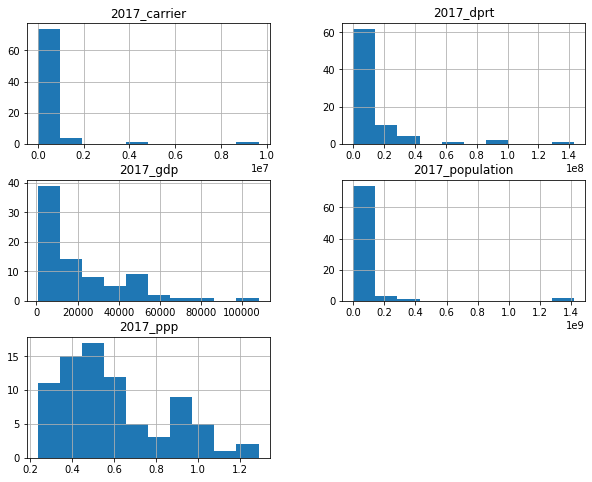

In [45]:
# Check the distribution of the data
df_17.hist(figsize=(10,8))

#### Code - Yearly Analysis

In [46]:
# Create a list which includes 1997 to 2017 where there is not missing data of the US, Japan, and Germany
years =[] 
for i in range(1997,2017):
    years.append(str(i))

In [47]:
# Create a list which includes countries of my interest in this analysis
countries = ['United States', 'Germany', 'Japan']

In [48]:
# melt the dprt table for analysis
dprt_clean = pd.melt(dprt, id_vars=["country"],
                           value_vars= years, value_name="dprt", var_name='years')

In [49]:
# extract each country's data from the dprt table
dprt_clean_jp = dprt_clean[dprt_clean["country"]=="Japan"]
dprt_clean_us = dprt_clean[dprt_clean["country"]=="United States"]
dprt_clean_de = dprt_clean[dprt_clean["country"]=="Germany"]

In [50]:
# melt the gdp table for analysis
gdp_clean = pd.melt(gdp, id_vars=["country"],
                           value_vars= years, value_name="gdp",var_name='years')

In [51]:
# extract each country's data from the dgp table
gdp_clean_jp = gdp_clean[gdp_clean["country"]=="Japan"]
gdp_clean_us = gdp_clean[gdp_clean["country"]=="United States"]
gdp_clean_de = gdp_clean[gdp_clean["country"]=="Germany"]

In [52]:
# melt the ppp table for analysis
ppp_clean = pd.melt(ppp, id_vars=["country"],
                           value_vars= years, value_name="ppp",var_name='years')

In [53]:
# extract each country's data from the ppp table
ppp_clean_jp = ppp_clean[ppp_clean["country"]=="Japan"]
ppp_clean_us = ppp_clean[ppp_clean["country"]=="United States"]
ppp_clean_de = ppp_clean[ppp_clean["country"]=="Germany"]

In [54]:
# melt the carrier table for analysis
carrier_clean = pd.melt(carrier, id_vars=["country"],
                           value_vars= years, value_name="carrier",var_name='years')

In [55]:
# extract each country's data from the dprt table
carrier_clean_jp = carrier_clean[carrier_clean["country"]=="Japan"]
carrier_clean_us = carrier_clean[carrier_clean["country"]=="United States"]
carrier_clean_de = carrier_clean[carrier_clean["country"]=="Germany"]

In [56]:
# melt the population table for analysis
population_clean = pd.melt(population, id_vars=["country"],
                           value_vars= years, value_name="population",var_name='years')

In [57]:
# extract each country's data from the population table
population_clean_jp = population_clean[population_clean["country"]=="Japan"]
population_clean_us = population_clean[population_clean["country"]=="United States"]
population_clean_de = population_clean[population_clean["country"]=="Germany"]

In [58]:
# merging tables for each country
merge_jp1 = pd.merge(left=population_clean_jp, right=dprt_clean_jp, on='years', how="inner")

In [59]:
merge_jp2 = pd.merge(left=merge_jp1, right=ppp_clean_jp, on='years', how="inner")

In [60]:
merge_jp3 = pd.merge(left=merge_jp2, right=gdp_clean_jp, on='years', how="inner")

In [61]:
df_jp = pd.merge(left=merge_jp3, right=carrier_clean_jp, on='years', how="inner")

In [62]:
merge_us1 = pd.merge(left=population_clean_us, right=dprt_clean_us, on='years', how="inner")

In [63]:
merge_us2 = pd.merge(left=merge_us1, right=ppp_clean_us, on='years', how="inner")

In [64]:
merge_us3 = pd.merge(left=merge_us2, right=gdp_clean_us, on='years', how="inner")

In [65]:
df_us = pd.merge(left=merge_us3, right=carrier_clean_us, on='years', how="inner")

In [66]:
merge_de1 = pd.merge(left=population_clean_de, right=dprt_clean_us, on='years', how="inner")

In [67]:
merge_de2 = pd.merge(left=merge_de1, right=ppp_clean_de, on='years', how="inner")

In [68]:
merge_de3 = pd.merge(left=merge_de2, right=gdp_clean_de, on='years', how="inner")

In [69]:
df_de = pd.merge(left=merge_de3, right=carrier_clean_de, on='years', how="inner")

In [70]:
# convert years' data data type back to int for analysis
df_jp["years"] = df_jp["years"].astype(int)
df_us["years"] = df_us["years"].astype(int)
df_de["years"] = df_de["years"].astype(int)

<a id='eda'></a>
## Exploratory Data Analysis

### `Country Comparative Analysis`: Do higher GDP per capita, higher Purchasing Power Parity(PPP) and higher Carrier Departure makes people travel internationally?

#### Create scatter plots to see there are correlation between `2017_dprt` and `2017_carrier`, `2017_ppp` and `2017_gdp`

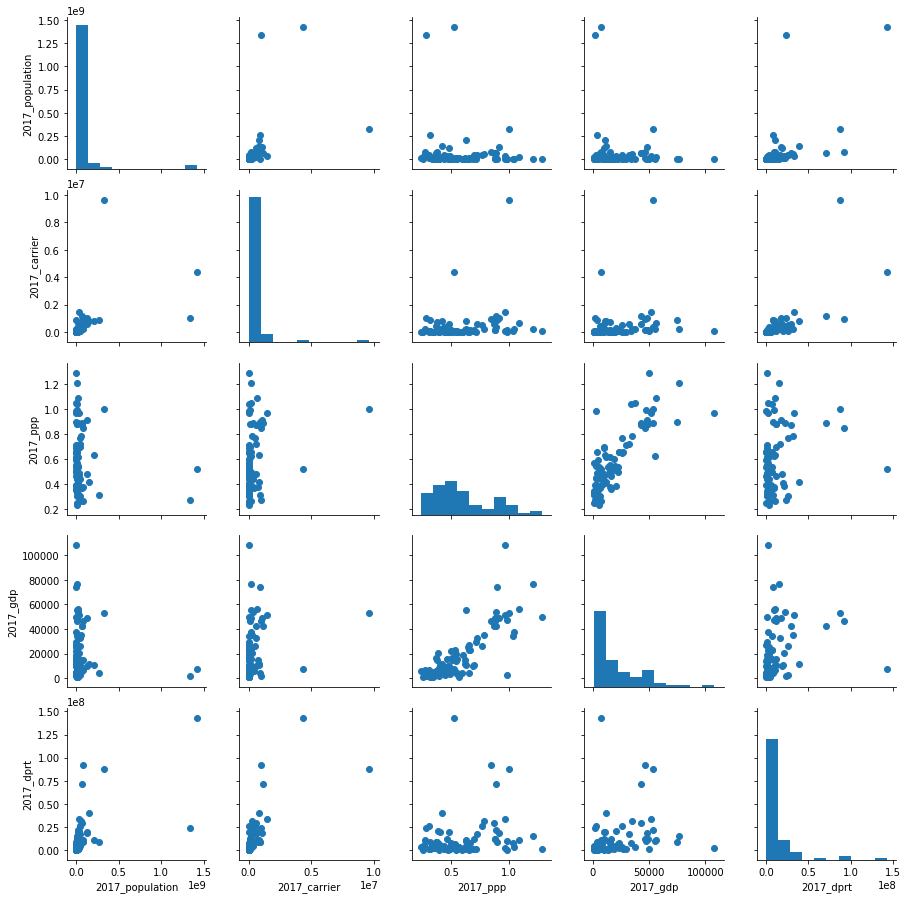

In [71]:
g = sns.PairGrid(data = df_17, vars = ['2017_population', '2017_carrier', '2017_ppp',"2017_gdp","2017_dprt"])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

> **Observation:** It seems that `2017_dprt` and `2017_carrier` and `2017_gdp` are positively correlated. Let's look closer look at those relationships

### Correlation between 2017_dprt and  2017_population

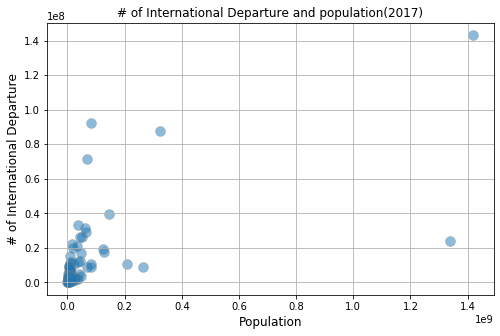

In [72]:
# visualization
y=df_17["2017_dprt"]
x=df_17["2017_population"]
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s= 100 ,cmap="Blues", edgecolors="grey", alpha=0.5,linewidth=0.5)
plt.xlabel("Population", fontsize="12")
plt.ylabel("# of International Departure", fontsize="12")
plt.title("# of International Departure and population(2017)")
plt.grid(True)

In [73]:
# Statistical analysis
df_17["intercept"] = 1

lm = sm.OLS(df_17["2017_dprt"], df_17[["intercept", "2017_population"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              2017_dprt   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     47.02
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.47e-09
Time:                        15:55:59   Log-Likelihood:                -1448.9
No. Observations:                  80   AIC:                             2902.
Df Residuals:                      78   BIC:                             2906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept        8.193e+06    2.1e+06      3.898      0.000    4.01e+06    1.24e+07
2017_population     0.0633      0.009      6.857      0.000       0.045       0.082
==============================================================================
Omnibus:                       45.861   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.784
Skew:                           1.539   Prob(JB):                     1.58e-59
Kurtosis:                      11.471   Cond. No.                     2.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
# checking which countries have higher value
df_17[df_17["2017_dprt"]> 30000000]

,country,2017_population,2017_carrier,2017_ppp,2017_gdp,2017_dprt,intercept
17,Canada,36700000,1440000.0,0.965,51300.0,33100000.0,1
21,China,1420000000,4360000.0,0.522,7330.0,143000000.0,1
42,Germany,82700000,956000.0,0.850,46700.0,92400000.0,1
53,Italy,60700000,244000.0,0.785,34900.0,31800000.0,1
87,Russia,146000000,816000.0,0.417,11400.0,39600000.0,1
112,United Kingdom,66700000,1180000.0,0.889,42500.0,71400000.0,1
113,United States,325000000,9640000.0,1.000,53100.0,87700000.0,1


In [75]:
# checking which countries have higher value
df_17[df_17["2017_population"]> 100000000]

,country,2017_population,2017_carrier,2017_ppp,2017_gdp,2017_dprt,intercept
13,Brazil,208000000,804000.0,0.631,10900.0,10600000.0,1
21,China,1420000000,4360000.0,0.522,7330.0,143000000.0,1
48,India,1340000000,1030000.0,0.276,1960.0,23900000.0,1
49,Indonesia,265000000,893000.0,0.312,4130.0,8860000.0,1
54,Japan,128000000,1040000.0,0.914,48600.0,17900000.0,1
69,Mexico,125000000,568000.0,0.478,9950.0,19100000.0,1
87,Russia,146000000,816000.0,0.417,11400.0,39600000.0,1
113,United States,325000000,9640000.0,1.000,53100.0,87700000.0,1


> **Observation**: Intuitively, the number of travelers and the population should be strongly correlated, but that is not always the case(conference is 0.06 and R square is 0.3). India, for example, has the second-largest population but sends only a small number of international tourists.

### Correlation between # of International Travel Departure per Person and GDP per Capita(2017)

> Let's take a closer look at the `# of International Travel Departure per Person` by deviding `2017_dprt` by `2017_population`

In [76]:
df_17["2017_travel_per_person"] = df_17["2017_dprt"]/df_17["2017_population"]

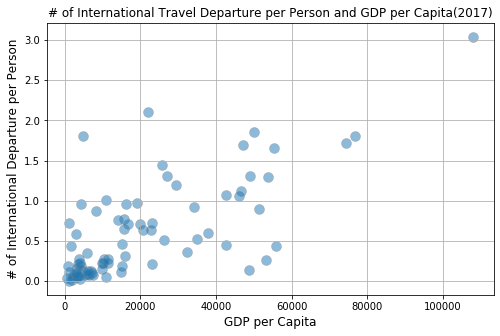

In [77]:
#visualization
y= (df_17["2017_travel_per_person"])
x=df_17["2017_gdp"]
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s= 100 ,cmap="Blues", edgecolors="grey", alpha=0.5,linewidth=0.5)
plt.xlabel("GDP per Capita", fontsize="12")
plt.ylabel("# of International Departure per Person", fontsize="12")
plt.title("# of International Travel Departure per Person and GDP per Capita(2017)")
plt.grid(True)

In [78]:
# Statistical analysis
df_17["intercept"] = 1

lm = sm.OLS(df_17["2017_travel_per_person"], df_17[["intercept", "2017_gdp"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     2017_travel_per_person   R-squared:                       0.505
Model:                                OLS   Adj. R-squared:                  0.499
Method:                     Least Squares   F-statistic:                     79.66
Date:                    Wed, 29 Apr 2020   Prob (F-statistic):           1.51e-13
Time:                            15:55:59   Log-Likelihood:                -44.701
No. Observations:                      80   AIC:                             93.40
Df Residuals:                          78   BIC:                             98.17
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1901      0.067      2.840      0.006       0.057       0.323
2017_gdp    2.023e-05   2.27e-06      8.925      0.000    1.57e-05    2.47e-05
==============================================================================
Omnibus:                       19.518   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.451
Skew:                           0.908   Prob(JB):                     3.30e-08
Kurtosis:                       5.653   Cond. No.                     4.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# checking which countries have higher value
df_17[df_17["2017_travel_per_person"]> 1]

,country,2017_population,2017_carrier,2017_ppp,2017_gdp,2017_dprt,intercept,2017_travel_per_person
0,Albania,2880000,1900.0,0.351,4870.0,5190000.0,1,1.802083
6,Austria,8820000,157000.0,0.879,49100.0,11500000.0,1,1.303855
8,Bahrain,1490000,54500.0,0.498,22100.0,3140000.0,1,2.107383
11,Belgium,11400000,146000.0,0.880,46100.0,12100000.0,1,1.061404
27,Cyprus,1180000,8700.0,0.714,29400.0,1410000.0,1,1.194915
37,Finland,5510000,119000.0,0.988,47100.0,9330000.0,1,1.693285
42,Germany,82700000,956000.0,0.850,46700.0,92400000.0,1,1.117291
47,Iceland,334000,50400.0,1.290,49900.0,619000.0,1,1.853293
51,Ireland,4750000,883000.0,0.898,74400.0,8170000.0,1,1.720000
63,Luxembourg,592000,48300.0,0.971,108000.0,1800000.0,1,3.040541


> **Observation**: Countries, where a person travels more than one time, seem high GDP per capita and high PP countries in some cases(R square is 0.5). However, there are some low GDP capita countries in the table above(i.e., Albania and Slovenia). Besides, some high GDP countries(i.e., US, Canada, Japan and Iceland) are not in the table above.

### Correlation between # of International Travel Departure per Person and PPP(2017)

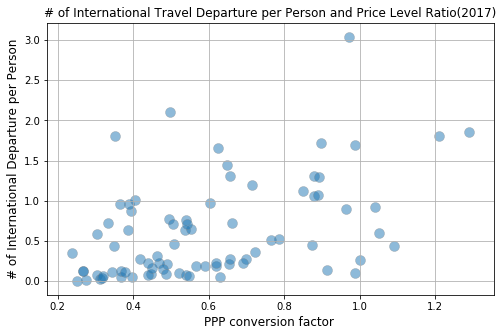

In [80]:
# visualization
y=df_17["2017_travel_per_person"]
x=df_17["2017_ppp"]
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s= 100 ,cmap="Blues", edgecolors="grey", alpha=0.5,linewidth=0.5)
plt.xlabel("PPP conversion factor ", fontsize="12")
plt.ylabel("# of International Departure per Person", fontsize="12")
plt.title("# of International Travel Departure per Person and Price Level Ratio(2017)")
plt.grid(True)

In [81]:
# Statistical analysis
df_17["intercept"] = 1

lm = sm.OLS(df_17["2017_travel_per_person"], df_17[["intercept", "2017_ppp"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     2017_travel_per_person   R-squared:                       0.223
Model:                                OLS   Adj. R-squared:                  0.213
Method:                     Least Squares   F-statistic:                     22.38
Date:                    Wed, 29 Apr 2020   Prob (F-statistic):           9.78e-06
Time:                            15:55:59   Log-Likelihood:                -62.758
No. Observations:                      80   AIC:                             129.5
Df Residuals:                          78   BIC:                             134.3
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0730      0.156     -0.468      0.641      -0.383       0.237
2017_ppp       1.1424      0.241      4.731      0.000       0.662       1.623
==============================================================================
Omnibus:                       24.774   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.440
Skew:                           1.266   Prob(JB):                     4.50e-09
Kurtosis:                       5.263   Cond. No.                         5.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
df_17[df_17["2017_ppp"]> 0.8]

,country,2017_population,2017_carrier,2017_ppp,2017_gdp,2017_dprt,intercept,2017_travel_per_person
5,Australia,24600000,672000.0,1.090,55900.0,10900000.0,1,0.443089
6,Austria,8820000,157000.0,0.879,49100.0,11500000.0,1,1.303855
11,Belgium,11400000,146000.0,0.880,46100.0,12100000.0,1,1.061404
17,Canada,36700000,1440000.0,0.965,51300.0,33100000.0,1,0.901907
37,Finland,5510000,119000.0,0.988,47100.0,9330000.0,1,1.693285
38,France,64800000,599000.0,0.874,42600.0,29100000.0,1,0.449074
42,Germany,82700000,956000.0,0.850,46700.0,92400000.0,1,1.117291
47,Iceland,334000,50400.0,1.290,49900.0,619000.0,1,1.853293
51,Ireland,4750000,883000.0,0.898,74400.0,8170000.0,1,1.720000
52,Israel,8240000,50300.0,1.040,34100.0,7600000.0,1,0.922330


> **Observation**: Intuitively, people in higher PPP countries should frequently travel to lower PPP countries to enjoy the price difference there; however, based on the data, that is not always the case(conference is 1.1 and R square is 0.2).

### Correlation between # of International Travel Departure per Person and Carrier Departure(2017)

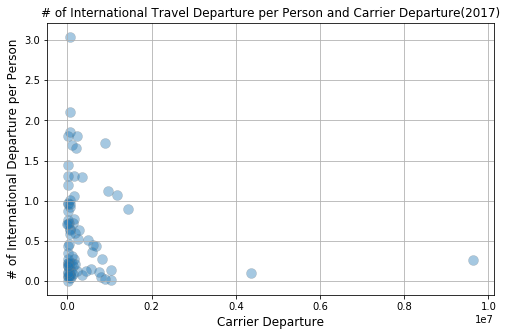

In [83]:
# visualization
y=df_17["2017_travel_per_person"]
x=df_17["2017_carrier"]
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=100,cmap="Blues", edgecolors="grey", alpha=0.4,linewidth=0.5)
plt.xlabel("Carrier Departure", fontsize="12")
plt.ylabel("# of International Departure per Person", fontsize="12")
plt.title("# of International Travel Departure per Person and Carrier Departure(2017)")
plt.grid(True)

In [84]:
# Statistical analysis
df_17["intercept"] = 1

lm = sm.OLS(df_17["2017_travel_per_person"], df_17[["intercept", "2017_carrier"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     2017_travel_per_person   R-squared:                       0.011
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                    0.8987
Date:                    Wed, 29 Apr 2020   Prob (F-statistic):              0.346
Time:                            15:56:00   Log-Likelihood:                -72.391
No. Observations:                      80   AIC:                             148.8
Df Residuals:                          78   BIC:                             153.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.6289      0.071      8.798      0.000       0.487       0.771
2017_carrier -5.429e-08   5.73e-08     -0.948      0.346   -1.68e-07    5.97e-08
==============================================================================
Omnibus:                       27.374   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.528
Skew:                           1.422   Prob(JB):                     5.82e-10
Kurtosis:                       5.161   Cond. No.                     1.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
df_17[df_17["2017_carrier"]>1000000]

,country,2017_population,2017_carrier,2017_ppp,2017_gdp,2017_dprt,intercept,2017_travel_per_person
17,Canada,36700000,1440000.0,0.965,51300.0,33100000.0,1,0.901907
21,China,1420000000,4360000.0,0.522,7330.0,143000000.0,1,0.100704
48,India,1340000000,1030000.0,0.276,1960.0,23900000.0,1,0.017836
54,Japan,128000000,1040000.0,0.914,48600.0,17900000.0,1,0.139844
112,United Kingdom,66700000,1180000.0,0.889,42500.0,71400000.0,1,1.070465
113,United States,325000000,9640000.0,1.000,53100.0,87700000.0,1,0.269846


> **Observation**: It turned out that the number of carrier departure is not strongly correlated to the international travel departure(conference is 1.1 and R square is 0.2).

### `Specific Country Analysis`:Have higher GDP per capita made people in Japan, Germany and US travel internationally?

- Based on the previous analysis, we now know that GDP per Capita correlates with the number of international departure per person to some extent.
- In order to confirm the above-observation, I am going to look at the yearly transition of GDP per Capita, Carrier Departure and the number of international departure per person in major developed countries the US, Germany, and Japan 

### Japan: yearly transition of GDP per Capita and the number of international departure per person

In [86]:
# convert the data into values
dprt_jp = (df_jp["dprt"].values/df_jp["population"].values)
gdp_jp =  df_jp["gdp"].values
years_jp= df_jp["years"].values

Text(0.5, 1.0, 'GDP per Capita, Japan(1997-2016)')

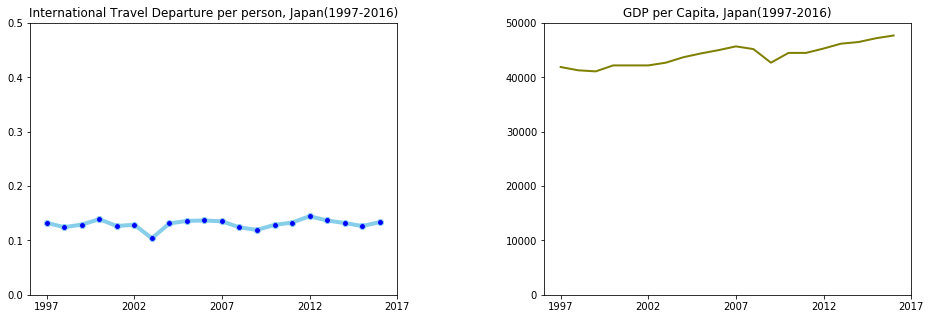

In [87]:
# visualization- line chart to see data transition over the years
plt.figure(figsize = [25, 5])
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(1, 3, 1)
plt.plot( years_jp, dprt_jp, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
plt.ylim(bottom=0, top=0.5)
plt.xticks([1997, 2002, 2007, 2012, 2017]) 
plt.title("International Travel Departure per person, Japan(1997-2016)")

plt.subplot(1, 3, 2)
plt.plot( years_jp, gdp_jp, marker='', color='olive', linewidth=2)
plt.ylim(bottom=0, top=50000)
plt.xticks([1997, 2002, 2007, 2012, 2017]) 
plt.title("GDP per Capita, Japan(1997-2016)")

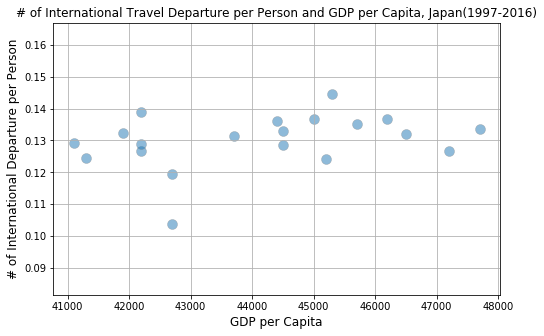

In [88]:
#visualization- scatter plot to look at the correlation closely 
y= dprt_jp
x= gdp_jp

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s= 100 ,cmap="Blues", edgecolors="grey", alpha=0.5,linewidth=0.5)
plt.xlabel("GDP per Capita", fontsize="12")
plt.ylabel("# of International Departure per Person", fontsize="12")
plt.title("# of International Travel Departure per Person and GDP per Capita, Japan(1997-2016)")
plt.grid(True)

In [89]:
# Statistical analysis
df_jp["intercept"] = 1

lm = sm.OLS(df_jp["dprt"]/df_jp["population"] , df_jp[["intercept", "gdp"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.117
Date:                Wed, 29 Apr 2020   Prob (F-statistic):              0.163
Time:                        15:56:00   Log-Likelihood:                 68.657
No. Observations:                  20   AIC:                            -133.3
Df Residuals:                      18   BIC:                            -131.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0693      0.042      1.660      0.114      -0.018       0.157
gdp         1.377e-06   9.46e-07      1.455      0.163   -6.11e-07    3.37e-06
==============================================================================
Omnibus:                       11.605   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.870
Skew:                          -1.212   Prob(JB):                      0.00719
Kurtosis:                       5.442   Cond. No.                     1.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> **Observation**: It turned out that GDP per capita is not strongly correlated to the international travel departure(R square is 0.1) at least for Japan during 1997-2016.

### United States: yearly transition of GDP per Capita and the number of international departure per person

In [90]:
# convert the data into values
dprt_us = (df_us["dprt"].values/df_us["population"].values)
gdp_us =  df_us["gdp"].values
carrier_us =  df_us["carrier"].values
years_us= df_us["years"].values

In [91]:
dprt_us

array([0.19558824, 0.20254545, 0.20501792, 0.21737589, 0.20842105,
       0.20243902, 0.19413793, 0.21164384, 0.21525424, 0.21375839,
       0.21262458, 0.21023102, 0.20294118, 0.19773463, 0.18974359,
       0.1933121 , 0.19398734, 0.2137931 , 0.23115265, 0.24829721])

Text(0.5, 1.0, 'GDP per Capita, USA(1997-2016)')

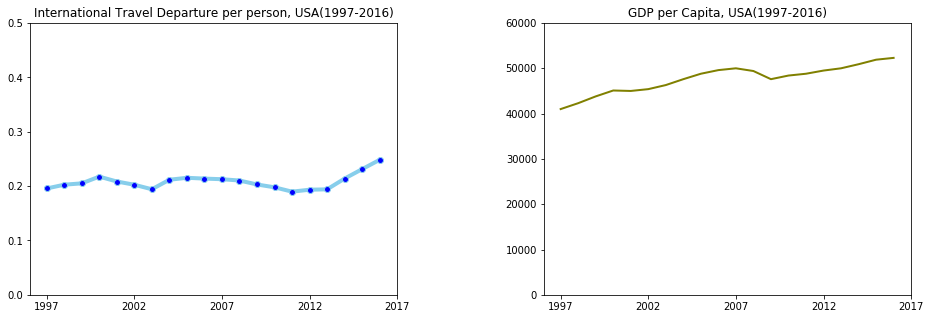

In [92]:
# visualization- line chart to see data transition over the years
plt.figure(figsize = [25, 5])
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(1, 3, 1)
plt.plot( years_us, dprt_us, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
plt.ylim(bottom=0, top=0.5)
plt.xticks([1997, 2002, 2007, 2012, 2017]) 
plt.title("International Travel Departure per person, USA(1997-2016)")

plt.subplot(1, 3, 2)
plt.plot( years_us, gdp_us, marker='', color='olive', linewidth=2)
plt.ylim(bottom=0, top=60000)
plt.xticks([1997, 2002, 2007, 2012, 2017]) 
plt.title("GDP per Capita, USA(1997-2016)")

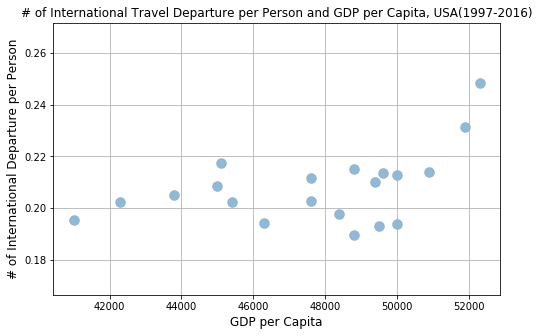

In [93]:
#visualization- scatter plot to look at the correlation closely 
y= dprt_us
x= gdp_us

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s= 100 ,cmap="Blues", edgecolors="grey", alpha=0.5,linewidth=0.5)
plt.xlabel("GDP per Capita", fontsize="12")
plt.ylabel("# of International Departure per Person", fontsize="12")
plt.title("# of International Travel Departure per Person and GDP per Capita, USA(1997-2016)")
plt.grid(True)

In [94]:
# Statistical analysis
df_us["intercept"] = 1

lm = sm.OLS(df_us["dprt"]/df_us["population"] , df_us[["intercept", "gdp"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     4.874
Date:                Wed, 29 Apr 2020   Prob (F-statistic):             0.0405
Time:                        15:56:01   Log-Likelihood:                 59.971
No. Observations:                  20   AIC:                            -115.9
Df Residuals:                      18   BIC:                            -114.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1090      0.045      2.426      0.026       0.015       0.203
gdp         2.076e-06    9.4e-07      2.208      0.040       1e-07    4.05e-06
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.468
Skew:                           0.318   Prob(JB):                        0.791
Kurtosis:                       3.396   Cond. No.                     7.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> **Observation**: It turned out that GDP per capita is not strongly correlated to the international travel departure(R square is 0.2) at least for the US during 1997-2016.

### Germany: yearly transition of GDP per Capita, Carrier Departure and the number of international departure per person

In [95]:
dprt_de = (df_de["dprt"].values/df_de["population"].values)
gdp_de =  df_de["gdp"].values
years_de= df_de["years"].values

Text(0.5, 1.0, 'GDP per Capita, Germay(1997-2016)')

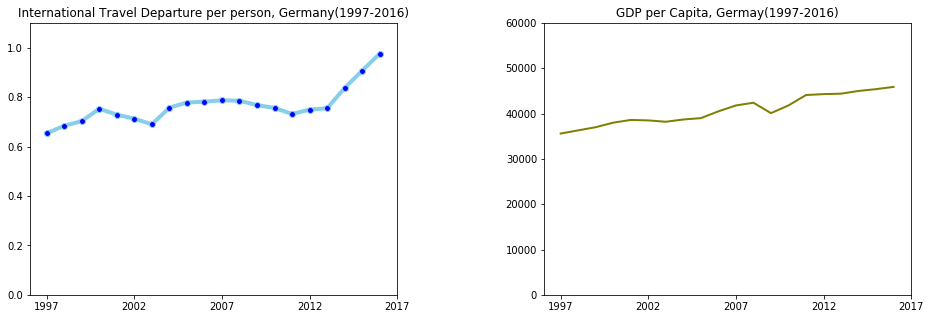

In [96]:
# visualization- line chart to see data transition over the years
plt.figure(figsize = [25, 5])
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(1, 3, 1)
plt.plot( years_de, dprt_de, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
plt.ylim(bottom=0, top=1.1)
plt.xticks([1997, 2002, 2007, 2012, 2017]) 
plt.title("International Travel Departure per person, Germany(1997-2016)")

plt.subplot(1, 3, 2)
plt.plot( years_de, gdp_de, marker='', color='olive', linewidth=2)
plt.ylim(bottom=0, top=60000)
plt.xticks([1997, 2002, 2007, 2012, 2017]) 
plt.title("GDP per Capita, Germay(1997-2016)")

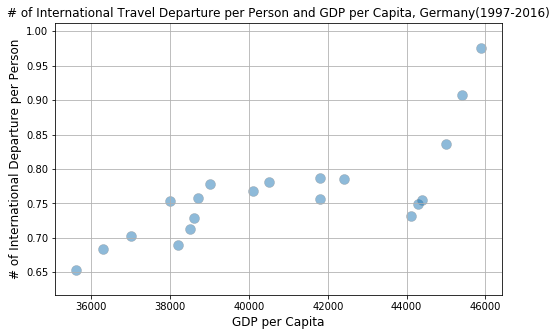

In [97]:
#visualization- scatter plot to look at the correlation closely 
y= dprt_de
x= gdp_de

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s= 100 ,cmap="Blues", edgecolors="grey", alpha=0.5,linewidth=0.5)
plt.xlabel("GDP per Capita", fontsize="12")
plt.ylabel("# of International Departure per Person", fontsize="12")
plt.title("# of International Travel Departure per Person and GDP per Capita, Germany(1997-2016)")
plt.grid(True)

In [98]:
# Statistical analysis
df_de["intercept"] = 1

lm = sm.OLS(df_de["dprt"]/df_de["population"] , df_de[["intercept", "gdp"]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     23.93
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           0.000117
Time:                        15:56:02   Log-Likelihood:                 32.544
No. Observations:                  20   AIC:                            -61.09
Df Residuals:                      18   BIC:                            -59.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0581      0.145      0.401      0.693      -0.246       0.363
gdp         1.733e-05   3.54e-06      4.891      0.000    9.88e-06    2.48e-05
==============================================================================
Omnibus:                        2.061   Durbin-Watson:                   0.598
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                0.649
Skew:                           0.287   Prob(JB):                        0.723
Kurtosis:                       3.670   Cond. No.                     5.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> **Observation**: It turned out that GDP per capita is correlated to the international travel departure(R square is 0.5) at least for Germany during 1997-2016.

<a id='conclusions'></a>

## Limitation  of this analysis
- **Limited yearly data for the number of international travel departures**: The number of international travel departures for the US, Germany and Japan is only available from 1997-2016. Due to this data availability limitation, this analysis is conducted by using the data from 1997-2016. Thus, the trend observed and analysis is only applicable to that period

- **Limited countries data for the number of international travel departures**: The number of international travel departure is only available in 122 countries. Due to this data availability limitation, Country Comparative Analysis is done for those 122 countries. Thus, the trend observed and analysis is only applicable to those countries

## Conclusions
- **Country Comparative Analysis**: The number of international travel departures per person and GDP per capita is correlated to some extent(R square is 0.5) when we compare 122 countries
- **Specific Country Analysis** :  At least for the US and Japan, GDP per capita does not strongly correlate to the number of international travel departure per person(R square is less than 0.2); however, Germany has stronger correlation with R square of 0.5

## Fiurther Research
- Going forward, further analysis can be done for countries with higher and lower correlations between the number of international travel departures per person and GDP per capita. Maybe other variables are also important in determining the number of international travel departures per person(e.g., geographical proximity to nearest countries(e.g., It is difficult for people in Japan to travel to other countries due to its geographical location. For the American people, unless they live closer to Canada and Mexico, most of the people cannot travel easily to other countries))